### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [1]:
import numpy as np
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [2]:
# Primero importamos las librerías necesarias

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as sfft

# Creamos una variable con la frecuencia de muestreo dada

Fs = 100

### 1.1 ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal?

Para obtener la cantidad de muestras que tiene la señal, calculamos el tamaño de x con size

~~~python
n = x.size
~~~

Para obtener la duración de la señal dividimos la cantidad de muestras entre la frecuencia de muestreo

~~~python
ts = n/Fs
~~~

In [3]:
# Creamos las variables necesarias

n = x.size
ts = n/Fs

# Imprimimos los resultados

print('Muestras:', n)
print('Tiempo:', ts, '[s]')

Muestras: 2000
Tiempo: 20.0 [s]


### 1.2 ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

La Frecuencia de Nyquist nos permite obtener la frecuencia máxima de muestreo. Esta se obtiene dividiendo la frecuencia de muestreo entre 2.

$$
\frac{F_s}{2} = \frac{100}{2} = 50 Hz
$$

### 1.3 Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo

In [4]:
# Primero creamos un vector de tiempo t

t = np.arange(0, ts, step=1./Fs)

<IPython.core.display.Javascript object>


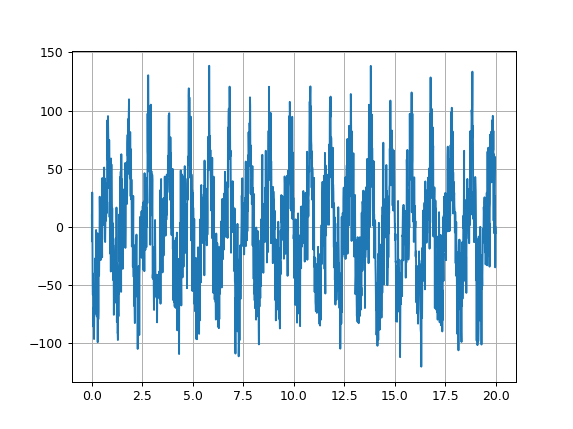

/home/esteban/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [5]:
# Realizamos el gráfico con la parte real e imaginaria

plt.figure()
plt.grid()
plt.plot(t,x)

### 1.4 Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

<IPython.core.display.Javascript object>


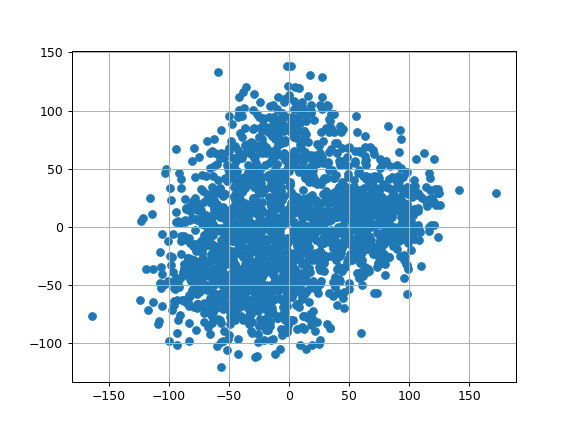

In [6]:
# Realizamos la nube de puntos con la parte imaginaria en función de la parte real

plt.figure()
plt.grid()
plt.scatter(x.imag,x.real)

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


### 2.1 Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 

In [7]:
def funcion(x):
    # Aplicamos la TTF al vector x y lo almacenamos en el vector X
    X = sfft.fft(x)
    # Para obtener las amplitudes de X, calculamos el valor absoluto y lo almacenamos en XA
    XA = np.absolute(X)
    # Para obtener las fases de X, calculamos el valor de las fases y los almacenamos en XP
    XP = np.angle(X)
    # Obtenemos las frecuencuas asociadas a las señal
    freqs = sfft.fftfreq(len(x),1/Fs)
    return X, XA, XP, freqs

In [8]:
X, XA, XP, freqs = funcion(x)

### 2.2 Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa

En la gráfica de amplitudes se puede ver que las amplitudes son mayores a 12000, como también la frecuencia va desde -50 a 50 Hz, concordando con los resultados obtenidos con la frecuencia de Nyquist.

<IPython.core.display.Javascript object>


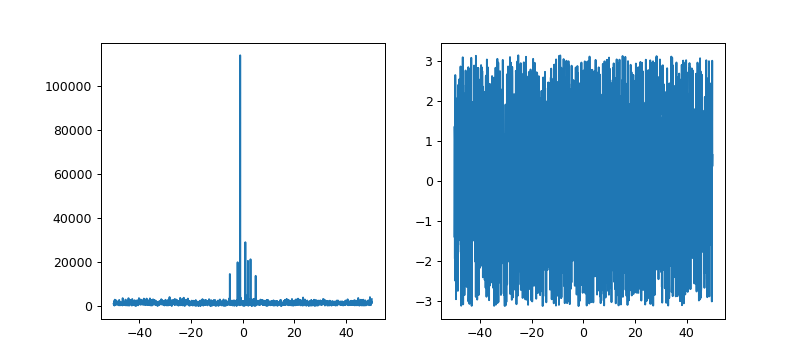

In [9]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
axes[0].plot(sfft.fftshift(freqs), sfft.fftshift(XA))
axes[1].plot(sfft.fftshift(freqs), sfft.fftshift(XP))

### 1.3 Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores### 

In [10]:
def M(m):
    XAc = np.zeros(len(XA))
    ind = XA.argsort()[-m:][::-1]
    for i in range(len(ind)): XAc[ind] = XA[ind]
    return XAc, ind

### 1.4 Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud

<IPython.core.display.Javascript object>


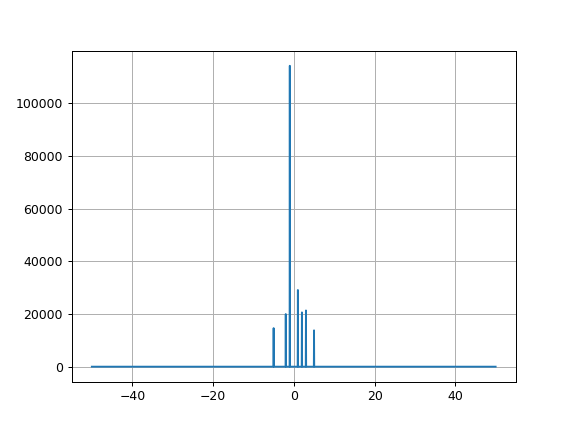

In [28]:
# Obtenemos el espectro y sus índices

esp, espi = M(7)

# Graficamos

plt.figure()
plt.grid()
plt.plot(sfft.fftshift(freqs), sfft.fftshift(esp))

In [27]:
# Amplitudes

Amp = esp[esp != 0]

# Fases

Pha = XP[espi]

# Valores de Frecuencias

Vfr = sfft.ifft(esp)

In [26]:
# Ordenando en orden descendente

Amp = -np.sort(-Amp)
Pha = -np.sort(-Pha)
Vfr = -np.sort(-Vfr)

## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

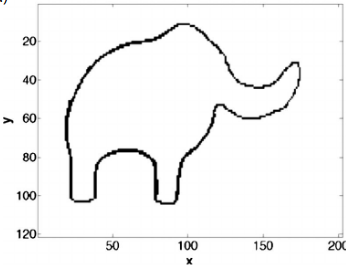